# Pet Adoption Prediction

The purpouse of this project is to predict the speed at which a pet is adopted, based on the data extracted from the pet’s listing on PetFinder.my (Malaysia’s leading online animal welfare platform) and available on [https://www.kaggle.com/c/petfinder-adoption-prediction/data].

The data includes text, tabular and image data for the pets. Exploratory data analysis can be used to derive relationships between the adoption speed and the various parameters available from the pet’s profile and suggest improvements to the profiles that would increase the animal’s adoptability. 
Some profiles represent a group of pets. In this case, the speed of adoption is determined by the speed at which all of the pets are adopted

## Data Fields
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese

# Importing the Data

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## Understanding the data

# Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from collections import Counter
import scipy.stats as ss


# Define files and directories
os.chdir('C:/Users/isado/Documents/SpringBoard/Capstone1/')
         
# Create DataFrame with training and testing data 
df_train = pd.read_csv('./train/train.csv')
df_test = pd.read_csv('./test/test.csv')

# Import Malaysian states labels and demographic summary 
state_labels = pd.read_csv('StateLabels.csv')
state_data = pd.read_csv('MalayDemographics2010.csv')
state_data.columns = state_data.columns.str.replace(' ', '').str.replace('%', '')#remove spaces and percent sign from column names

# Import breed labels decoder for petfinder data 
df_breedlabelsdogs = pd.read_csv('breed_labels_dogs.csv', index_col = 'BreedID' )

# Import breed traits data 
df_breedtraits = pd.read_csv('dogtraits_main.csv')
df_breedtraits.columns = df_breedtraits.columns.str.replace(' ', '')#remove spaces from column names

# Exploring Imported Data

In [2]:
# First look at imported data: select sample of 3 random rows 
df_train.sample(n=3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
4947,1,MAPLE,4,307,0,2,5,0,0,2,...,1,1,0,41326,1f139bc7f77c28b5f2c41a9fc9ab9189,0,WAS LEFT WITH HER SISTER OUTSIDE 99 SPEED MART...,a83683f66,4.0,3
10016,2,"Ginger, Dusty And Junior",3,299,0,3,2,3,5,2,...,1,3,0,41326,c64184145e214af56e4a91decc30ea54,0,My cat Zara gave birth and now we have 4 littl...,5dce619e3,5.0,1
4901,2,NaN,2,266,0,1,1,2,0,2,...,1,1,70,41326,536143a2fdcd6255610979fc42cd59f4,0,"Cute and very active. Need new home, loving ow...",3cae1b9ae,1.0,2


In [3]:
# Print train DataFrame summary
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [4]:
# Print test DataFrame summary
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
Type            3972 non-null int64
Name            3561 non-null object
Age             3972 non-null int64
Breed1          3972 non-null int64
Breed2          3972 non-null int64
Gender          3972 non-null int64
Color1          3972 non-null int64
Color2          3972 non-null int64
Color3          3972 non-null int64
MaturitySize    3972 non-null int64
FurLength       3972 non-null int64
Vaccinated      3972 non-null int64
Dewormed        3972 non-null int64
Sterilized      3972 non-null int64
Health          3972 non-null int64
Quantity        3972 non-null int64
Fee             3972 non-null int64
State           3972 non-null int64
RescuerID       3972 non-null object
VideoAmt        3972 non-null int64
Description     3971 non-null object
PetID           3972 non-null object
PhotoAmt        3972 non-null float64
dtypes: float64(1), int64(18), object(4)
memory usage: 713.

In [5]:
df_train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [6]:
state_data.describe()

,"Area(1,000km)",TotalPopulation,PopulationDensity,AverageAnnualPopulationGrowthRate,DistributionofPopulationbyState,UrbanPopulation,MedianAge,DependencyRatio,SexRatio,LaborForce(thousands),EthnicGroupsBumiputera,EthnicGroupsChinese,EthnicGroupsIndians,EthnicGroupsOthers
count,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,38918.000000,3.333428e+06,781.294118,2.729412,11.782353,70.935294,26.011765,49.370588,103.823529,1498.917647,72.788235,20.629412,5.788235,0.770588
std,81896.305116,6.583168e+06,1645.852468,3.905407,23.227199,18.149722,1.876793,6.424539,5.615106,2972.463314,17.287130,13.452823,5.172389,0.733796
min,49.000000,7.241300e+04,20.000000,1.200000,0.300000,42.400000,22.800000,36.600000,89.000000,40.300000,43.600000,0.700000,0.200000,0.000000
25%,1048.000000,1.021064e+06,86.000000,1.500000,3.700000,54.000000,25.200000,46.300000,101.000000,403.200000,58.900000,12.800000,0.900000,0.400000
50%,9500.000000,1.561383e+06,174.000000,1.700000,5.500000,69.700000,26.200000,48.200000,104.000000,770.000000,74.800000,23.200000,6.200000,0.500000
75%,21035.000000,2.471140e+06,676.000000,2.000000,8.700000,86.500000,27.000000,53.500000,107.000000,1103.400000,84.800000,28.600000,10.300000,0.800000
max,330803.000000,2.833414e+07,6891.000000,17.800000,100.000000,100.000000,29.600000,61.100000,113.000000,12740.700000,98.000000,45.600000,15.200000,2.400000


In [7]:
#concatenate training and testing data
df_adoption_full = pd.concat([df_train, df_test], sort=False)
df_adoption_full.tail(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
3969,2,NaN,5,300,0,3,1,2,4,2,...,1,6,0,41401,30aa45fdbe45e39d5614ef583b569073,0,these cat's mother was killed when they was ne...,399013029,1.0,NaN
3970,1,Smokey,24,307,0,2,5,7,0,2,...,1,1,0,41325,087903c2819a6297519c93d962b488d5,0,"smokey is good family pet. very obedient,so lo...",fd80b8c80,3.0,NaN
3971,2,NaN,1,266,0,3,1,7,0,1,...,1,6,0,41326,041876679ae0261e3ee4aefe9e66316f,0,Found abandoned with the mother at nearby shop...,493ed84ae,1.0,NaN


# Checking for missing values

In [8]:
#Function that calculates percentage of missing data
def missingData(dataframe):
    missing = False
    for item in (dataframe.isnull().sum()).iteritems():
        if item[1] > 0:
            print('Missing Data percentage for '+item[0]+' is {:2.2%}'.format((item[1]/dataframe.shape[0])) )
            missing = True
    if not missing:
        print('Found no missing values.')            

In [9]:
missingData(df_train)

Missing Data percentage for Name is 8.38%
Missing Data percentage for Description is 0.08%


In [10]:
missingData(df_test)

Missing Data percentage for Name is 10.35%
Missing Data percentage for Description is 0.03%


In [11]:
missingData(state_data)

Found no missing values.


In [12]:
missingData(df_breedtraits)

Found no missing values.


In [13]:
missingData(df_breedlabelsdogs)

Found no missing values.


In [14]:
# To enable us to explore numeric relationships in more depth, the number of days until adoption will also
# be added using an average value of number of days until adoption for each category in AdoptionSpeed
# Since category 4 doesn't provide us with a date range like the other categories 150 days are assumed, which might lead to some 
# innacuracy when exploring relationships between variables for pets in category 4

DaysToAdoption = {0:0, 1:4, 2:19, 3:61, 4:150}

df_train['DaysToAdoption'] = df_train['AdoptionSpeed'].map(DaysToAdoption)

df_train[['DaysToAdoption','AdoptionSpeed']].head(10)

,DaysToAdoption,AdoptionSpeed
0,19,2
1,0,0
2,61,3
3,19,2
4,19,2
5,19,2
6,4,1
7,61,3
8,4,1
9,150,4


In [15]:
# To enable us to do more data exploration an additional column (NoAdoption) will be created to easily identify those pets in category 4 that were not adopted after 100 days
df_train['NoAdoption'] = df_train['AdoptionSpeed'].apply(lambda x: True if x == 4 else False)

df_train[['NoAdoption','AdoptionSpeed']].head(10)

,NoAdoption,AdoptionSpeed
0,False,2
1,False,0
2,False,3
3,False,2
4,False,2
5,False,2
6,False,1
7,False,3
8,False,1
9,True,4


## Merging PetFinder and State Demographic data

In [16]:
df_train = pd.merge(df_train, state_labels, how='left', left_on='State', right_on='StateID').drop('StateID', axis =1)
df_train_states = pd.merge(df_train, state_data, how='left', left_on='StateName', right_on='REGION')

df_train_states

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,DistributionofPopulationbyState,UrbanPopulation,MedianAge,DependencyRatio,SexRatio,LaborForce(thousands),EthnicGroupsBumiputera,EthnicGroupsChinese,EthnicGroupsIndians,EthnicGroupsOthers
0,2,Nibble,3,299,0,1,1,7,0,1,...,19.3,91.4,27.0,40.3,107,2710.8,57.1,28.6,13.5,0.8
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,0.3,82.3,25.2,45.4,107,837.6,83.7,13.4,0.9,2.0
2,1,Brisco,1,307,0,1,2,7,0,2,...,19.3,91.4,27.0,40.3,107,2710.8,57.1,28.6,13.5,0.8
3,1,Miko,4,307,0,2,1,2,0,2,...,0.3,82.3,25.2,45.4,107,837.6,83.7,13.4,0.9,2.0
4,1,Hunter,1,307,0,1,1,0,0,2,...,19.3,91.4,27.0,40.3,107,2710.8,57.1,28.6,13.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,19.3,91.4,27.0,40.3,107,2710.8,57.1,28.6,13.5,0.8
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,19.3,91.4,27.0,40.3,107,2710.8,57.1,28.6,13.5,0.8
14990,2,Monkies,2,265,266,3,5,6,7,3,...,19.3,91.4,27.0,40.3,107,2710.8,57.1,28.6,13.5,0.8
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,11.8,71.9,27.0,48.2,112,1499.9,58.9,33.6,7.1,0.4


## Merging PetFinder and Dog Breed Traits data

In [17]:
#creating a dataframes of dogs only
df_adoption_dogs = df_train[df_train['Type'] == 1]

# adding breed label data to the adoption data based on Breed1 and Breed2
df_adoption_breeds = pd.merge(df_adoption_dogs, df_breedlabelsdogs, how ='left', left_on='Breed1', right_on='BreedID')
df_adoption_breeds = pd.merge(df_adoption_breeds, df_breedlabelsdogs, how='left', left_on='Breed2', right_on='BreedID', suffixes=('_1', '_2'),)

df_adoption_breeds.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'DaysToAdoption', 'NoAdoption', 'StateName', 'BreedLabel_1',
       'BreedLabel_2'],
      dtype='object')

In [18]:
#adding traits data based on 'Breed1' then on 'Breed2'
df_adoption_traits = pd.merge(df_adoption_breeds, df_breedtraits, how='left', left_on='BreedLabel_1', right_on='BreedName')

df_adoption_traits = pd.merge(df_adoption_traits, df_breedtraits, how='left', left_on='BreedLabel_2', right_on='BreedName', suffixes=('_1', '_2'))

#remove data for which breed1 and breed2 traits are missing 
df_adoption_traits = df_adoption_traits[(df_adoption_traits['BreedName_1'].notnull()) | (df_adoption_traits['BreedName_2'].notnull())]

#df_adoption_traits[~df_adoption_traits['Breed1'].isna() & ~df_adoption_traits['Breed2'].isna()]

# Data Visualization

### Description of Adoption Speeds
- 0 - Pet was adopted on the same day as it was listed.
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### Overall Distribution of Adoption Speeds in Training Set

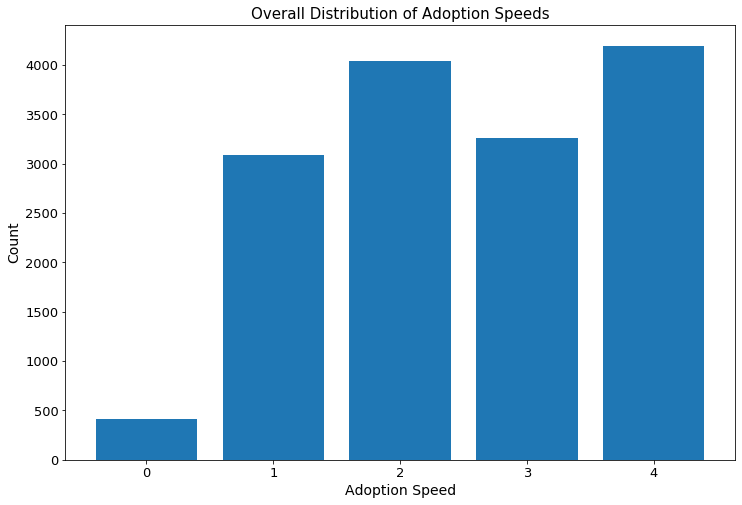

In [19]:
plt.figure(figsize=(12, 8))
plt.hist(df_train['AdoptionSpeed'], bins=[0,1,2,3,4,5] ,rwidth = 0.8, align = 'left')
plt.yticks(fontsize=13)
plt.xticks([0,1,2,3,4], fontsize=13)
plt.title('Overall Distribution of Adoption Speeds', fontsize=15)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Adoption Speed', fontsize=14)
plt.show()

### Is there a difference in adoption rates for cats vs dogs?

In [20]:
df_train['Type'] = df_train['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')

gender_dict = {1:'Male', 2:'Female'}
df_train_gender = df_train
df_train_gender['Gender']= df_train['Gender'].map(gender_dict)
df_train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,DaysToAdoption,NoAdoption,StateName
0,Cat,Nibble,3,299,0,Male,1,7,0,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,19,False,Selangor
1,Cat,No Name Yet,1,265,0,Male,1,2,0,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,0,False,Kuala Lumpur
2,Dog,Brisco,1,307,0,Male,2,7,0,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,61,False,Selangor
3,Dog,Miko,4,307,0,Female,1,2,0,2,...,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,19,False,Kuala Lumpur
4,Dog,Hunter,1,307,0,Male,1,0,0,2,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,19,False,Selangor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,Cat,NaN,2,266,0,NaN,1,0,0,2,...,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2,19,False,Selangor
14989,Cat,Serato & Eddie,60,265,264,NaN,1,4,7,2,...,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4,150,True,Selangor
14990,Cat,Monkies,2,265,266,NaN,5,6,7,3,...,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3,61,False,Selangor
14991,Cat,Ms Daym,9,266,0,Female,4,7,0,1,...,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4,150,True,Johor


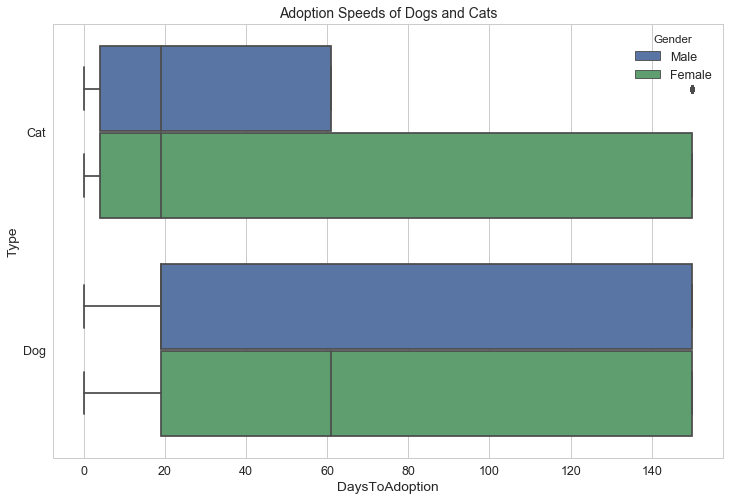

In [21]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
sns.boxplot(x ='DaysToAdoption', y='Type', hue='Gender', data=df_train_gender)
plt.title('Adoption Speeds of Dogs and Cats', fontsize=14)
plt.show()

Males seem to get adoped faster than females. To explore whether this pattern is valid for both cats and dogs we break the data down further in the plots below

In [22]:
#Breaking down the gender differences between cats and dogs
#g = sns.FacetGrid(df_train, col="Type", row = 'Gender', hue='Type')
#g = g.map(plt.hist, "AdoptionSpeed", bins=([-0.5,.5,1.5,2.5,3.5,4.5]), rwidth = 0.8).set(xticks=[0,1,2,3,4])

### Are younger pets more likely to get adopted quickly?

In [23]:
pd.crosstab(df_train.AdoptionSpeed, df_train.Age)

Age,0,1,2,3,4,5,6,7,8,9,...,132,135,144,147,156,168,180,212,238,255
AdoptionSpeed,,,,,,,,,,,,,,,,,,,,,
0,10,54,115,44,24,7,20,7,4,5,...,0,0,0,0,0,0,0,0,0,0
1,50,643,865,408,211,100,80,43,36,24,...,1,0,0,1,0,0,0,0,0,0
2,44,754,1120,586,265,157,117,59,68,51,...,1,0,1,0,1,0,0,0,0,0
3,39,511,783,458,260,135,115,62,70,31,...,3,1,1,0,0,1,1,2,0,0
4,36,342,620,470,349,196,226,110,131,73,...,3,0,2,0,0,0,1,1,1,2


Converting the pet's age into years will make the data easier to read. 
255 months is the maximum and seems pretty old at 21 years and change, but with the oldest recorded cat at 38 yo and the oldest recorded dog at 29yo, we cannot rule it out.

In [24]:
ss.pointbiserialr(df_train['NoAdoption'], df_train['Age'])

PointbiserialrResult(correlation=0.11043932612065595, pvalue=6.616521713632641e-42)

In [25]:
ss.pearsonr(df_train['AdoptionSpeed'], df_train['Age'])

(0.1005099328830761, 5.706872051967977e-35)

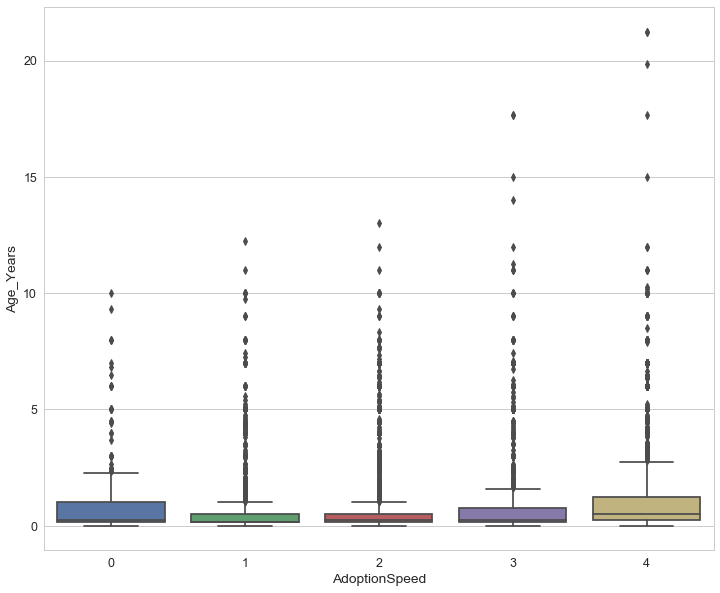

In [26]:
df_train['Age_Years']= df_train['Age']/12

fig=plt.figure(figsize=(12, 10))
sns.boxplot(x ='AdoptionSpeed', y='Age_Years', data=df_train);

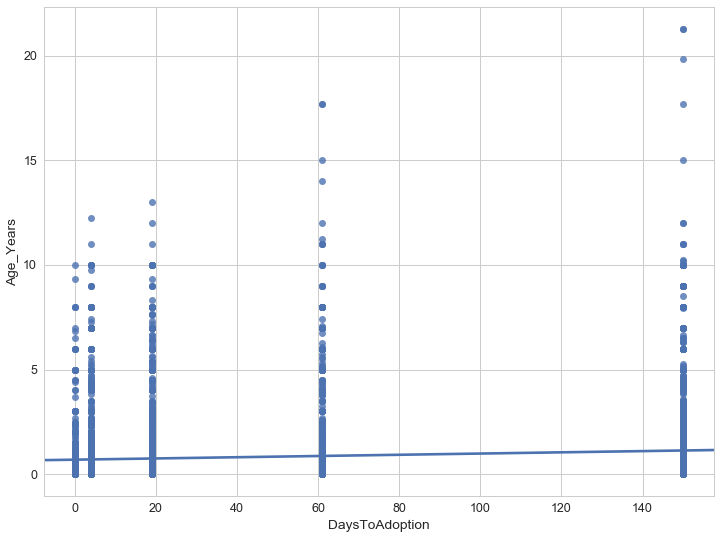

In [27]:
fig=plt.figure(figsize=(12, 9))
sns.regplot(x ='DaysToAdoption', y='Age_Years', data=df_train);

### How much does Health Impact Adoption Speed?

In [28]:
#Health status 1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified
health_summary = pd.crosstab(df_train.AdoptionSpeed, df_train.Health).transpose()
health_summary['Total'] = health_summary.sum(axis=1)
health_summary.reset_index()

AdoptionSpeed,Health,0,1,2,3,4,Total
0,1,392,2999,3925,3150,4012,14478
1,2,17,89,106,98,171,481
2,3,1,2,6,11,14,34


In [29]:
#The great majority of animals are "Healthy"
#Below we add columns calculating the percentage of animals in each adoption speed category per health status

for column in health_summary.columns[:-1]:
    health_summary[str(column)+'_%'] = (health_summary[column]/health_summary['Total']*100).round(2)

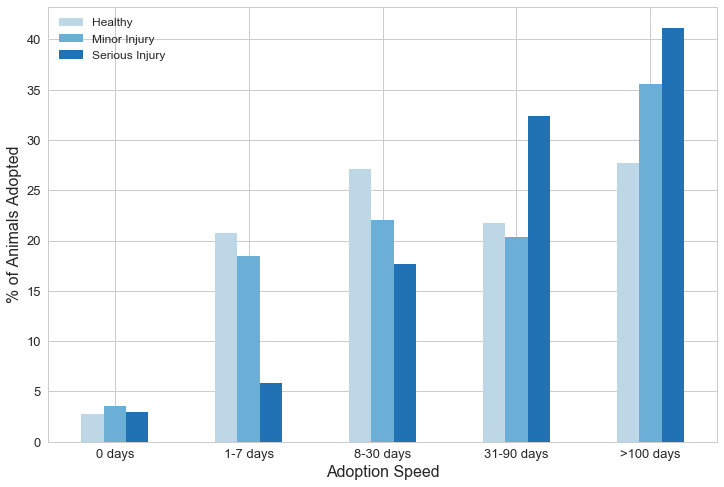

In [30]:
my_colors = ['#bdd7e7','#6baed6','#2171b5','#08519c']
plot = health_summary.iloc[:,-5:].transpose().plot.bar(figsize=(12,8), rot=0, fontsize=13, color=my_colors)
plot.set_xticklabels(('0 days','1-7 days','8-30 days','31-90 days','>100 days'))
plot.set_ylabel('% of Animals Adopted', fontsize=16)
plot.set_xlabel('Adoption Speed', fontsize=16);
plot.legend(['Healthy', 'Minor Injury', 'Serious Injury'], fontsize=12);

Over 40% of animals with serious injuries are not adopted after 100 days, for healthy animals that number is only at 28% . Minor injuries also seems to impact the rate at which animals don't get adopted.

In [31]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [32]:
# Set up the data for comparison (creates a specialised object)
df_train['Health'].replace({1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury'}, inplace= True)

MultiComp = MultiComparison(df_train['DaysToAdoption'],
                            df_train['Health'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

     Multiple Comparison of Means - Tukey HSD,FWER=0.05     
   group1        group2     meandiff  lower    upper  reject
------------------------------------------------------------
  Healthy     Minor Injury   9.8641   3.4739  16.2542  True 
  Healthy    Serious Injury 24.2704   0.5973  47.9434  True 
Minor Injury Serious Injury 14.4063  -10.0604 38.8731 False 
------------------------------------------------------------


### Are dogs with identified breeds more likely to get adopted than those labeled as "Mixed Breed"?

In [33]:
#For this analysis we will be using "Breed1" dog breed values 

breed_adoption_rates = pd.pivot_table(df_adoption_breeds[['AdoptionSpeed','BreedLabel_1']], index=['BreedLabel_1'], columns=['AdoptionSpeed'], aggfunc=len, fill_value=0)

breed_adoption_rates['BreedTotal'] = breed_adoption_rates.sum(axis = 1)

for column in breed_adoption_rates.columns[:-1]:
    breed_adoption_rates[str(column)+'_%'] = (breed_adoption_rates[column]/breed_adoption_rates['BreedTotal']*100).round(2)

#(df_train[(df_train['Type']==1) & (df_train['Breed1']== 307)]['AdoptionSpeed']==4).mean()

breed_adoption_rates = breed_adoption_rates.sort_values(by='BreedTotal', ascending=False)

breed_adoption_rates.head(15)

AdoptionSpeed,0,1,2,3,4,BreedTotal,0_%,1_%,2_%,3_%,4_%
BreedLabel_1,,,,,,,,,,,
Mixed Breed,81,859,1575,1381,2027,5923,1.37,14.50,26.59,23.32,34.22
Labrador Retriever,7,45,68,74,36,230,3.04,19.57,29.57,32.17,15.65
Shih Tzu,8,66,53,35,27,189,4.23,34.92,28.04,18.52,14.29
Poodle,16,51,47,30,25,169,9.47,30.18,27.81,17.75,14.79
Airedale Terrier,1,29,46,52,34,162,0.62,17.90,28.40,32.10,20.99
Golden Retriever,10,44,43,33,21,151,6.62,29.14,28.48,21.85,13.91
German Shepherd Dog,1,24,36,23,16,100,1.00,24.00,36.00,23.00,16.00
German Spitz,3,12,26,29,23,93,3.23,12.90,27.96,31.18,24.73
Beagle,7,25,15,29,14,90,7.78,27.78,16.67,32.22,15.56


From the summary table above several things become clear:
- Dogs simply labelled as 'mixed breed' are the most abundant and constitute over 1/3 of all dogs in the dataset
- Dogs labeled as 'mixed breed' have one of the highest percentages of no adoption after 100 days at 34.2%
- Poodles and the Standard Schnauzers have high rates of same day adoption at 9.5 and 8.7%

For a more clear summary, 'mixed breed' animals are compared against the overall average of all other breeds below:

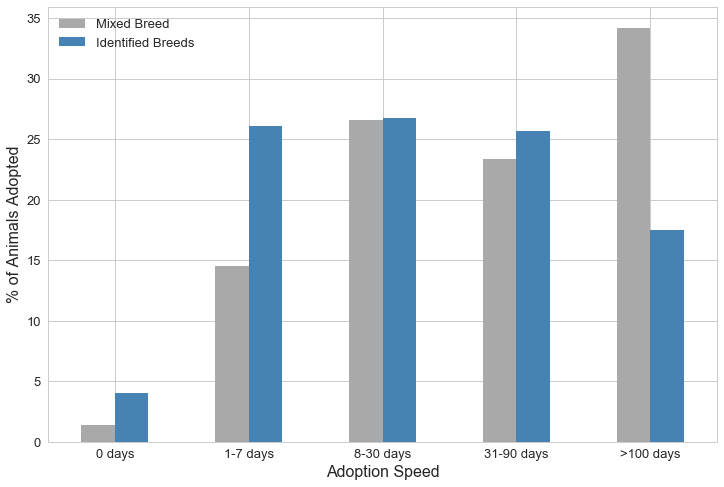

In [34]:
comparison = breed_adoption_rates.iloc[0:1,0:6]#mixed breed row
other_breed_rates = breed_adoption_rates.iloc[1:,0:6].sum()
comparison = comparison.append(other_breed_rates.rename('Identified Breeds'))

for column in comparison.columns[:-1]:
    comparison[str(column)+'_%'] = (comparison[column]/comparison['BreedTotal']*100).round(2)
    
comparison = (comparison.iloc[:,-5:]).transpose()

my_colors = ['darkgrey','steelblue']
#my_colors = ['silver','black']
plot = comparison.plot.bar(figsize=(12,8), rot=0, fontsize=13, color=my_colors)
plot.set_xticklabels(('0 days','1-7 days','8-30 days','31-90 days','>100 days'))
plot.set_ylabel('% of Animals Adopted', fontsize=16)
plot.set_xlabel('Adoption Speed', fontsize=16)
plot.legend(fontsize=13);

To determine whether this difference is statistically significant we perform a chi-squared test for adoption speed between MixedBreed animals and identified breed animals.

In [35]:
contingency_table = breed_adoption_rates.iloc[0:1,0:5]
contingency_table = contingency_table.append(breed_adoption_rates.iloc[1:,0:5].sum().rename('Identified Breeds'))
contingency_table

AdoptionSpeed,0,1,2,3,4
BreedLabel_1,,,,,
Mixed Breed,81,859,1575,1381,2027
Identified Breeds,89,576,589,566,385


In [36]:
# chi-squared test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(contingency_table)
print('dof=%d' % dof)
print(expected)

# interpreting test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpreting p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[ 123.8816437  1045.70681594 1576.94045276 1418.80917815 1757.66190945]
 [  46.1183563   389.29318406  587.05954724  528.19082185  654.33809055]]
probability=0.950, critical=9.488, stat=333.457
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


Dogs labeled as simply 'mixed breed' have lower rates of adoption in categories 0-3 (adoption withn 90 days) and are **~2X as likely of ending up in category 4 (no adoption after 100 days)**

### What are the most popular breeds?

In [37]:
breed_adoption_rates[breed_adoption_rates['BreedTotal'] > 25].sort_values(by='4_%').head(5)

AdoptionSpeed,0,1,2,3,4,BreedTotal,0_%,1_%,2_%,3_%,4_%
BreedLabel_1,,,,,,,,,,,
Cocker Spaniel,1,12,14,10,5,42,2.38,28.57,33.33,23.81,11.90
Doberman Pinscher,2,13,13,26,8,62,3.23,20.97,20.97,41.94,12.90
Chihuahua,0,10,12,10,5,37,0.00,27.03,32.43,27.03,13.51
Rottweiler,5,27,22,22,12,88,5.68,30.68,25.00,25.00,13.64
Golden Retriever,10,44,43,33,21,151,6.62,29.14,28.48,21.85,13.91


For breeds with at least **25 samples (what is a statistically significant sample?) ** Cocker Spaniels, Doberman Pinscher and Chihuahua have the lowest rates of no adoption after 90 days

### Is there a difference in adoption rates for different sized dogs?

In [38]:
#MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large)
#Cats' sizes don't vary as much so they are excluded from this comparison

size_summary = pd.crosstab(df_adoption_dogs.MaturitySize, df_adoption_dogs.AdoptionSpeed)
size_summary['Total'] = size_summary.sum(axis=1)
size_summary

AdoptionSpeed,0,1,2,3,4,Total
MaturitySize,,,,,,
1,50,283,310,245,335,1223
2,99,978,1652,1541,1857,6127
3,21,168,192,157,222,760
4,0,6,10,6,0,22


In [39]:
#Below we add columns calculating the percentage of animals in each adoption speed category per size
for column in size_summary.columns[:-1]:
    size_summary[str(column)+'_%'] = (size_summary[column]/size_summary['Total']*100).round(2)

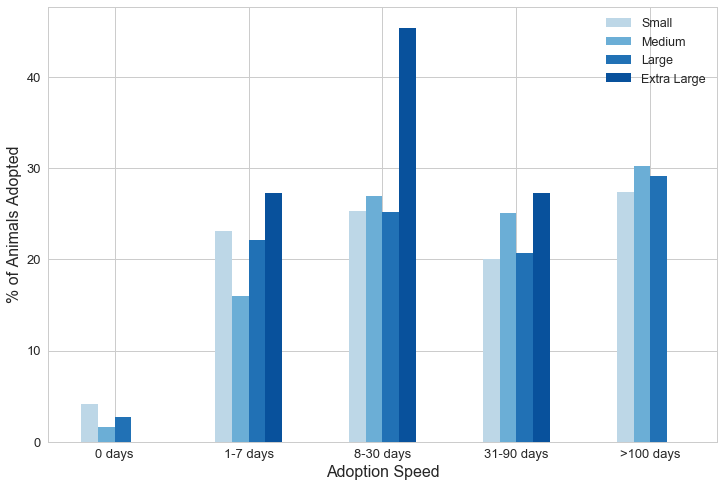

In [40]:
my_colors = ['#bdd7e7','#6baed6','#2171b5','#08519c']
plot = size_summary.iloc[:,-5:].transpose().plot.bar(figsize=(12,8), rot=0, fontsize=13, color=my_colors)
plot.set_xticklabels(('0 days','1-7 days','8-30 days','31-90 days','>100 days'))
plot.set_ylabel('% of Animals Adopted', fontsize=16)
plot.set_xlabel('Adoption Speed', fontsize=16)
plot.legend(['Small', 'Medium', 'Large', 'Extra Large']);

### Are there differences in adoption rates between the various states?

In [41]:
states_summary = pd.crosstab(df_train.State, df_train.AdoptionSpeed)
states_summary['Total'] = states_summary.sum(axis=1)
states_summary.head(5)

AdoptionSpeed,0,1,2,3,4,Total
State,,,,,,
41324,4,18,23,12,80,137
41325,3,14,34,23,36,110
41326,246,1877,2435,2004,2152,8714
41327,8,122,216,197,300,843
41330,3,48,111,117,141,420


In [42]:
for column in states_summary.columns[:-1]:
    states_summary[str(column)+'_%'] = (states_summary[column]/states_summary['Total']*100).round(2)

# adding state names
states_summary = pd.merge(states_summary, state_labels, how ='left', left_on='State', right_on='StateID').drop('StateID', axis=1)
states_summary.set_index('StateName')

,0,1,2,3,4,Total,0_%,1_%,2_%,3_%,4_%
StateName,,,,,,,,,,,
Melaka,4,18,23,12,80,137,2.92,13.14,16.79,8.76,58.39
Kedah,3,14,34,23,36,110,2.73,12.73,30.91,20.91,32.73
Selangor,246,1877,2435,2004,2152,8714,2.82,21.54,27.94,23.00,24.70
Pulau Pinang,8,122,216,197,300,843,0.95,14.47,25.62,23.37,35.59
Perak,3,48,111,117,141,420,0.71,11.43,26.43,27.86,33.57
Negeri Sembilan,4,36,63,42,108,253,1.58,14.23,24.90,16.60,42.69
Pahang,3,29,14,16,23,85,3.53,34.12,16.47,18.82,27.06
Johor,23,113,136,103,132,507,4.54,22.29,26.82,20.32,26.04
Sarawak,1,1,0,2,9,13,7.69,7.69,0.00,15.38,69.23


### Which features have the strongest correlation to adoption speed?

In [43]:
#Breaking Down numerical and categorical features
categorical = ['Type', 'Breed1', 'Gender', 'Color1', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State',
       'NoAdoption', 'StateName']

numerical = ['Age', 'Adaptability_1', 'AllAroundFriendliness_1',
       'HealthGrooming_1', 'Trainability_1', 'ExerciseNeeds_1', 'Quantity']
target = ['NoAdoption']

In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [45]:
#Dropping all ID features and columns derived from AdoptionSpeed

df_train = pd.read_csv('./train/train.csv')
df_train['NoAdoption'] = df_train['AdoptionSpeed'].apply(lambda x: True if x == 4 else False)
data = df_train.drop(columns=['AdoptionSpeed','Name','Description','PetID','RescuerID','Fee','VideoAmt','PhotoAmt', 'Color2','Color3', 'Breed2'])


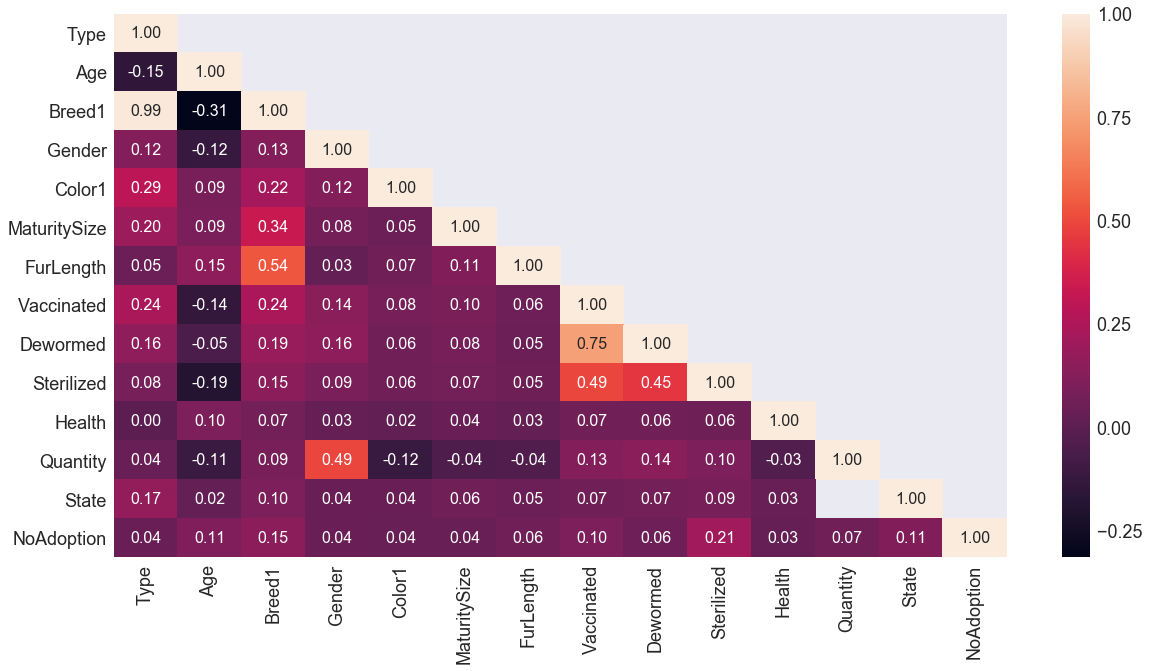

In [46]:
columns = data.columns
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
        
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in categorical) and ((columns[j] in categorical)):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
            
            elif (columns[i] in numerical) and (columns[j] in numerical):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                if pvalue > 0.05:
                    corr_factor = np.nan
                
            else:
                corr_factor, pvalue = ss.pointbiserialr(data[columns[j]], data[columns[i]])
                if pvalue > 0.05:
                    corr_factor = np.nan
                
            corr.loc[columns[j],columns[i]] = corr_factor
    
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.8) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 16})
plt.show()    


### Are breed traits correlated with higher adoption rates?

In [47]:
df_adoption_traits

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,AllAroundFriendliness_1,HealthGrooming_1,Trainability_1,ExerciseNeeds_1,BreedName_2,Adaptability_2,AllAroundFriendliness_2,HealthGrooming_2,Trainability_2,ExerciseNeeds_2
7,1,Max,78,218,205,1,1,7,0,2,...,4.0,3.0,5.0,5.0,Shih Tzu,3.0,5.0,2.0,3.0,2.0
13,1,Hunter,14,189,0,1,1,2,0,3,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
14,1,Benji & Kimi,4,205,218,3,2,7,0,1,...,5.0,2.0,3.0,2.0,Airedale Terrier,2.0,4.0,3.0,5.0,5.0
18,1,Jack,5,128,307,1,7,0,0,2,...,5.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
23,1,Blackie Duo,1,307,141,2,1,0,0,2,...,NaN,NaN,NaN,NaN,Labrador Retriever,3.0,5.0,4.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,1,D144(030217),48,83,0,1,5,0,0,1,...,5.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
8117,1,Racer,7,182,0,1,1,2,0,1,...,4.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8118,1,Maddie,1,218,307,2,1,2,0,2,...,4.0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
8129,1,Terry,24,179,307,1,2,3,7,2,...,5.0,2.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


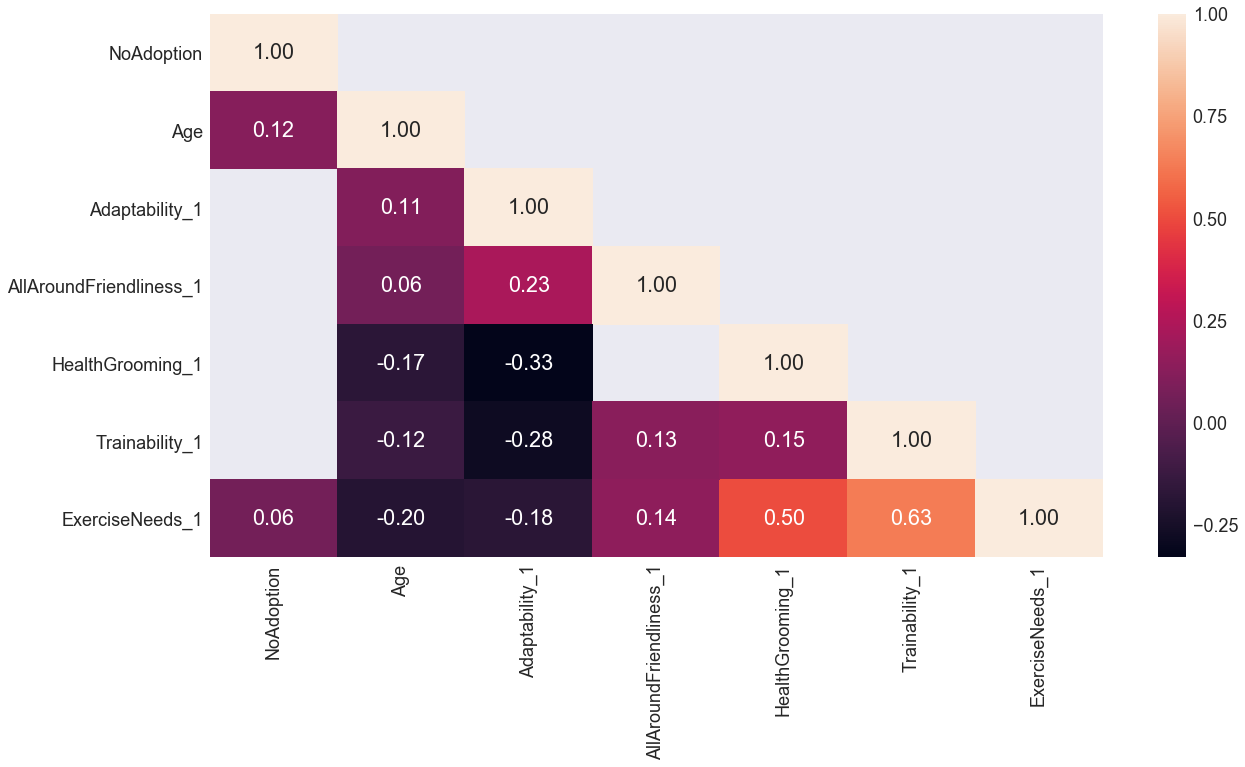

In [48]:
#Among dogs that had breed1 traits available . Dropping all ID features and breed 2 traits
traits_1 = ['NoAdoption','Age','Adaptability_1', 'AllAroundFriendliness_1', 'HealthGrooming_1', 'Trainability_1', 'ExerciseNeeds_1']
data = df_adoption_traits[traits_1].dropna()
targetvariable = 'NoAdoption' 

corr = pd.DataFrame(index=data.columns,columns=data.columns)#initialize empty dataframe to be populated with correlation factors
columns = data.columns

alpha = 0.05

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
            if i == j:
                corr[columns[j]][columns[i]] = 1.0
            if (columns[i] == targetvariable) or (columns[j] == targetvariable):    
                corr_factor, pvalue = ss.pointbiserialr(data[columns[j]], data[columns[i]])
            else:
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
            if pvalue <= alpha:
                corr.loc[columns[j],columns[i]] = corr_factor
    
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.8) 
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()  

### Are there differences in adoption rates for the various states?

In [49]:
df_train_states['Type'] = df_train_states['Type'].map({1:'Dog', 2:'Cat'})

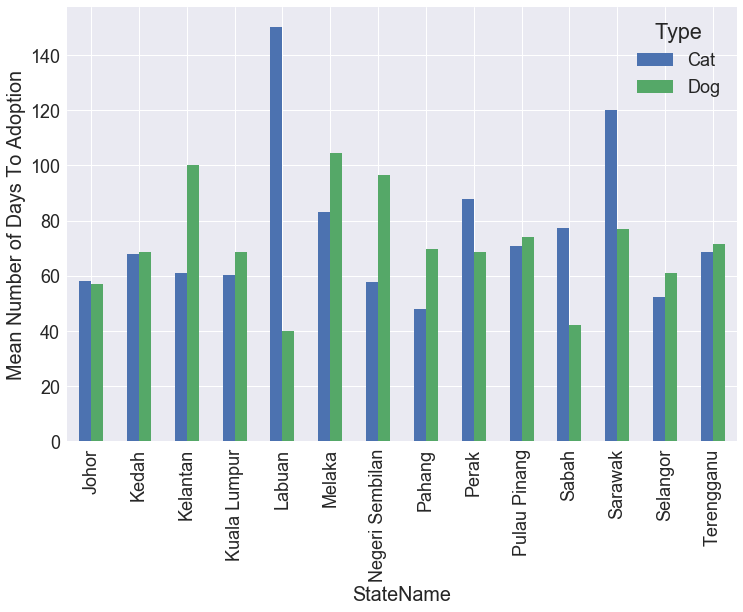

In [74]:
average_days_adoption = df_train_states.groupby(['StateName','Type'])['DaysToAdoption'].mean()

ax = average_days_adoption.unstack().plot.bar(figsize=(12,8))
ax.set_ylabel("Mean Number of Days To Adoption");

In [51]:
average_days_adoption
#sns.barplot(x='StateName', y='DaysToAdoption', hue='Type', df=average_days_adoption)

StateName        Type
Johor            Cat      58.074236
                 Dog      56.906475
Kedah            Cat      67.830189
                 Dog      68.596491
Kelantan         Cat      60.833333
                 Dog     100.000000
Kuala Lumpur     Cat      60.296571
                 Dog      68.435685
Labuan           Cat     150.000000
                 Dog      40.000000
Melaka           Cat      83.120000
                 Dog     104.425287
Negeri Sembilan  Cat      57.729730
                 Dog      96.443662
Pahang           Cat      47.862745
                 Dog      69.617647
Perak            Cat      87.760870
                 Dog      68.640244
Pulau Pinang     Cat      70.943966
                 Dog      73.895254
Sabah            Cat      77.294118
                 Dog      42.200000
Sarawak          Cat     120.181818
                 Dog      77.000000
Selangor         Cat      52.322429
                 Dog      61.085837
Terengganu       Cat      68.478261
      

In [52]:
#Exploring correlation 
state_vars = ['NoAdoption', 'Area(1,000km)',
       'TotalPopulation', 'PopulationDensity',
       'AverageAnnualPopulationGrowthRate', 'DistributionofPopulationbyState',
       'UrbanPopulation', 'MedianAge', 'DependencyRatio', 'SexRatio',
       'LaborForce(thousands)', 'EthnicGroupsBumiputera',
       'EthnicGroupsChinese', 'EthnicGroupsIndians', 'EthnicGroupsOthers']

data = df_train_states[state_vars].dropna()
targetvariable = 'NoAdoption' 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14993 entries, 0 to 14992
Data columns (total 15 columns):
NoAdoption                           14993 non-null bool
Area(1,000km)                        14993 non-null int64
TotalPopulation                      14993 non-null int64
PopulationDensity                    14993 non-null int64
AverageAnnualPopulationGrowthRate    14993 non-null float64
DistributionofPopulationbyState      14993 non-null float64
UrbanPopulation                      14993 non-null float64
MedianAge                            14993 non-null float64
DependencyRatio                      14993 non-null float64
SexRatio                             14993 non-null int64
LaborForce(thousands)                14993 non-null float64
EthnicGroupsBumiputera               14993 non-null float64
EthnicGroupsChinese                  14993 non-null float64
EthnicGroupsIndians                  14993 non-null float64
EthnicGroupsOthers                   14993 non-null float64
dt

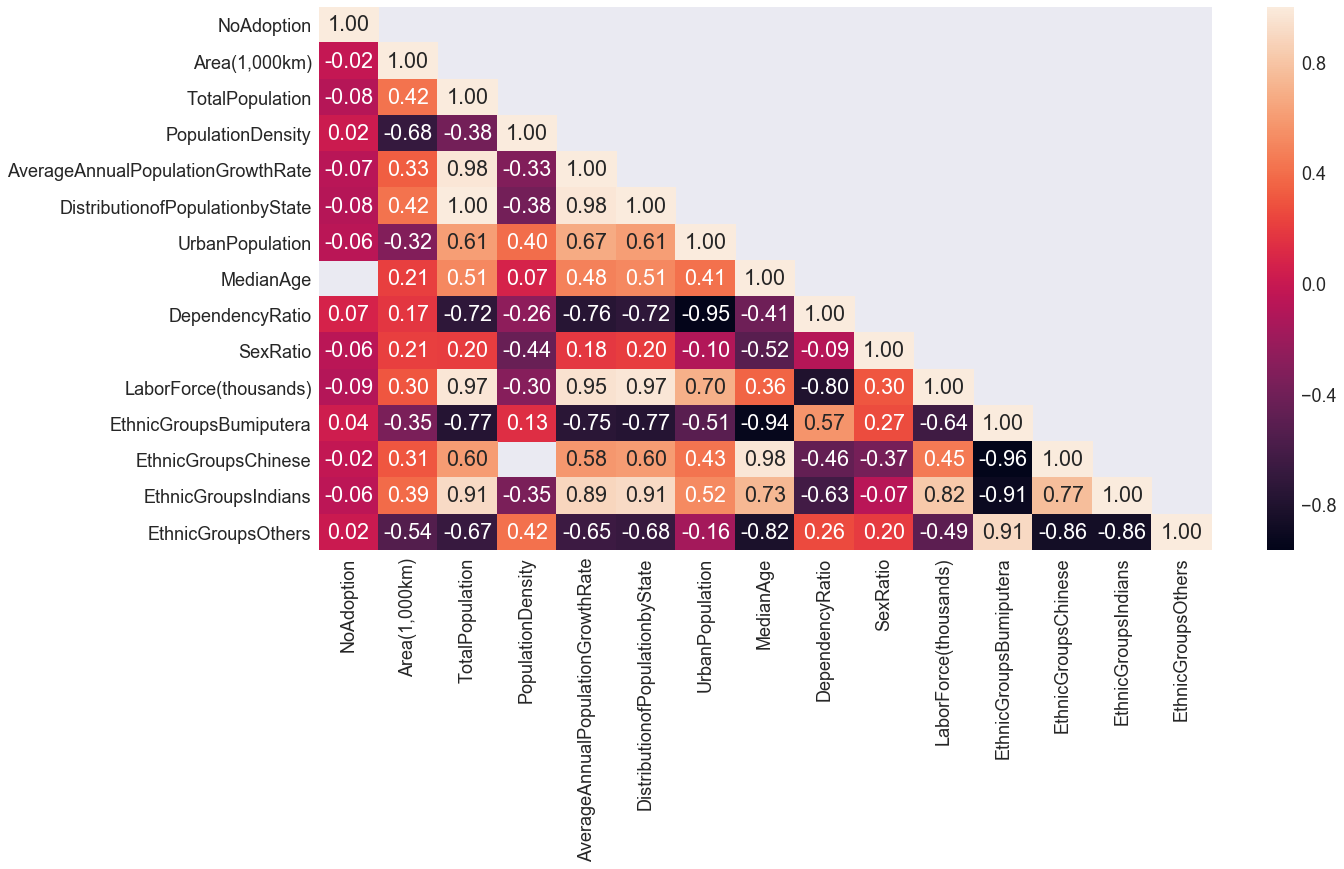

In [53]:
corr = pd.DataFrame(index=data.columns,columns=data.columns)#initialize empty dataframe to be populated with correlation factors
columns = data.columns

alpha = 0.05

for i in range(0, len(columns)):
    for j in range(i, len(columns)):
            if i == j:
                corr[columns[j]][columns[i]] = 1.0
            corr_factor, pvalue = ss.pointbiserialr(data[columns[j]], data[columns[i]])    
            if pvalue <= alpha:
                corr.loc[columns[j],columns[i]] = corr_factor
    
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,10))
sns.set(font_scale=1.8) 
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()  